In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report



In [2]:
data = pd.read_csv('lending_data.csv')

In [3]:
data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [5]:
data.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


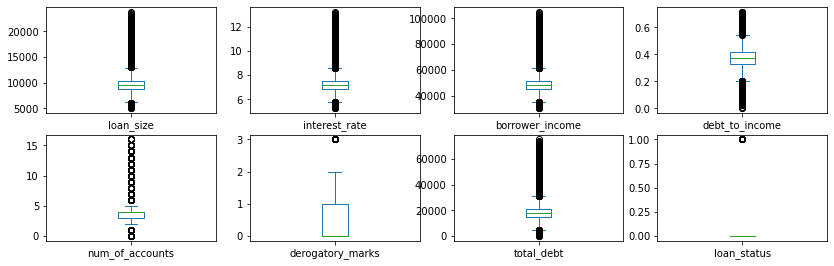

In [6]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14,9))
plt.show()

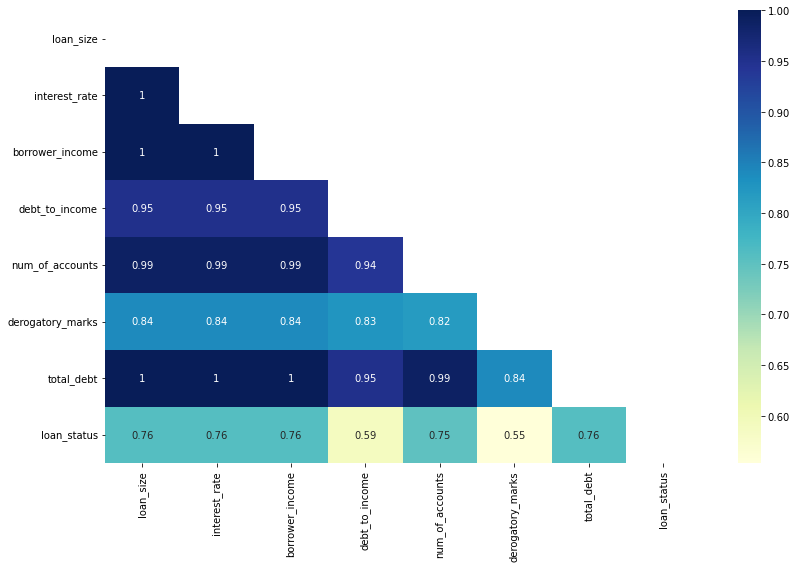

In [7]:
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(data.corr()))
 
# plotting a triangle correlation heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.tight_layout()
plt.show()

# Making a Prediction between Logistic Regression Model and Random Forest Classifer Model.

## i think Random forest classifier will perform better than Logistics Regression Model because it reduces biasness in the data and also helps in making accurate decision.

In [8]:
# Define the X (features) and y (target) sets
y = data["loan_status"].values
X = data.drop("loan_status", axis=1)

In [9]:
data['loan_status'].value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [10]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
X_test.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
67504,8100.0,6.575,42500,0.294118,2,0,12500
55887,9000.0,6.930,45800,0.344978,3,0,15800
14010,9900.0,7.345,49700,0.396378,4,0,19700
43768,9100.0,6.976,46200,0.350649,3,0,16200
24257,10100.0,7.427,50500,0.405941,4,1,20500


# Logistic Regression Model.

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [13]:
classifier.fit(X_train, y_train) 

LogisticRegression()

In [14]:
 print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9919177328380795
Testing Data Score: 0.9924680148576145


# Random Forest Classifier Model

In [15]:
# Prepare the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42) 

In [18]:
model.fit(X_train_scaled, y_train) 

RandomForestClassifier(random_state=42)

In [19]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [20]:
y_test = label_encoder.transform(y_test)
accuracy_score(y_test, y_pred)

0.9917457697069748

## From the above analysis, the following were discovered;
1.) Logistic Regression Model with accurate or test result = 0.9924 slightly performed better than Random Forest Classifier Model with accurate or score = 0.9917.

2.) The above results showed opposite to my initial prediction.

3.) Logistic Regression Model accurate or test result = 0.9924 * 100 = 99.24%
    Random Forest Classifier Model  accurate or score = 0.9917 * 100 = 99.17%
    
4.) Both Logistic Regression Model and Random Forest Classifier Model performed really well because they're approximately one which makes both models almost perfect fit for the above data.